## Import the important libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
original_data=pd.read_csv("used-car-dataset.csv")

In [3]:
original_data["Seats"].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [4]:
original_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## Check For Data Metrics

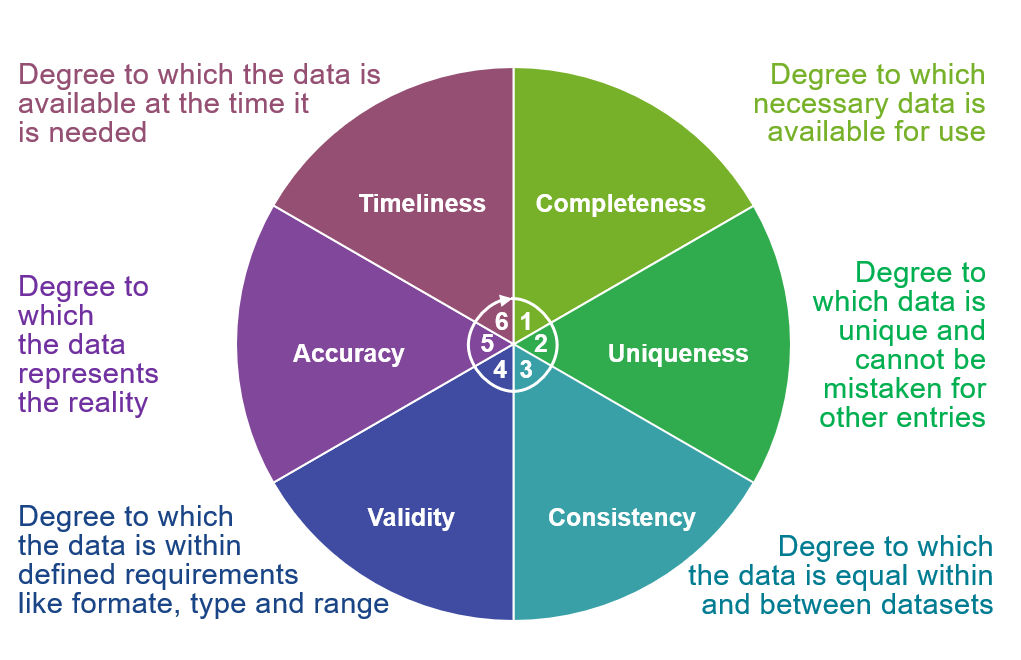

### % of null information

In [5]:
#check for completness 
for i in original_data.columns:
    null_percent=original_data[i].isnull().sum()/len(original_data[i])
    print(f"{i} has {null_percent} null info")
    print("-------------")

Unnamed: 0 has 0.0 null info
-------------
Name has 0.0 null info
-------------
Location has 0.0 null info
-------------
Year has 0.0 null info
-------------
Kilometers_Driven has 0.0 null info
-------------
Fuel_Type has 0.0 null info
-------------
Transmission has 0.0 null info
-------------
Owner_Type has 0.0 null info
-------------
Mileage has 0.0003322811098189068 null info
-------------
Engine has 0.005981059976740323 null info
-------------
Power has 0.005981059976740323 null info
-------------
Seats has 0.006977903306197043 null info
-------------
New_Price has 0.8631001827546104 null info
-------------
Price has 0.0 null info
-------------


**New_Price has 0.8631001827546104 null info so it must be elimnated an unamed columns has no meaning**

**majority of new price coulumn is null so droping the unamed and New_Price features**


In [6]:
original_data.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)

## Data Validity

In [7]:
original_data.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5084,Hyundai Verna 1.6 SX,Kochi,2015,60519,Diesel,Manual,First,22.32 kmpl,1582 CC,126.32 bhp,5.0,6.24
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65 kmpl,2993 CC,255 bhp,5.0,97.07
2127,Maruti Baleno Delta,Mumbai,2016,12573,Petrol,Manual,First,21.4 kmpl,1197 CC,83.1 bhp,5.0,5.80
1719,Toyota Etios G Safety,Kochi,2012,44223,Petrol,Manual,First,17.6 kmpl,1496 CC,88.7 bhp,5.0,3.99
1344,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.53 kmpl,1794 CC,138.1 bhp,5.0,3.41
1455,Toyota Corolla Altis 1.8 G,Mumbai,2010,93000,Petrol,Manual,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,4.50
3743,Hyundai Verna 1.6 SX VTVT AT,Bangalore,2014,45000,Petrol,Automatic,First,15.74 kmpl,1591 CC,121.3 bhp,5.0,7.50
4662,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2005,128000,Diesel,Manual,Second,12.8 kmpl,2494 CC,102 bhp,8.0,4.25
4990,Maruti Swift Dzire VDI,Pune,2015,131000,Diesel,Manual,First,26.59 kmpl,1248 CC,74 bhp,5.0,3.60
2567,Hyundai i10 Era,Kochi,2013,56075,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0,3.12


**Convert every word to lower levels to make it easy to navigate**

In [8]:
original_data["Price_Lakh"]=original_data["Price"]
original_data["Brand"]=original_data["Name"].str.split(expand=True)[0].str.lower()
original_data["Name"]=original_data["Name"].str.lower()
original_data["Location"]=original_data["Location"].str.lower()
original_data["Fuel_Type"]=original_data["Fuel_Type"].str.lower()
original_data["Transmission"]=original_data["Transmission"].str.lower()
original_data["Owner_Type"]=original_data["Owner_Type"].str.lower()

In [9]:
original_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Lakh,Brand
0,maruti wagon r lxi cng,mumbai,2010,72000,cng,manual,first,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,1.75,maruti
1,hyundai creta 1.6 crdi sx option,pune,2015,41000,diesel,manual,first,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,12.50,hyundai
2,honda jazz v,chennai,2011,46000,petrol,manual,first,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,4.50,honda
3,maruti ertiga vdi,chennai,2012,87000,diesel,manual,first,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,6.00,maruti
4,audi a4 new 2.0 tdi multitronic,coimbatore,2013,40670,diesel,automatic,second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,17.74,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,maruti swift vdi,delhi,2014,27365,diesel,manual,first,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,4.75,maruti
6015,hyundai xcent 1.1 crdi s,jaipur,2015,100000,diesel,manual,first,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,4.00,hyundai
6016,mahindra xylo d4 bsiv,jaipur,2012,55000,diesel,manual,second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,2.90,mahindra
6017,maruti wagon r vxi,kolkata,2013,46000,petrol,manual,first,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,2.65,maruti


**fetch the model information from the name column**

In [10]:
#identify the kength of words in each line 
original_data["lenght_of_names"]=original_data["Name"].apply(lambda x: len(x.split()))

In [11]:
def extract_brand_model(car_name):
    # Split the string and take the most words that can describe the model of the vehicle
    words = car_name.split()
    if len(words) == 3:
        return words[1]
    elif len(words) > 3:
        return ' '.join(words[1:3])
    else:
        return car_name

In [12]:
original_data["Model"]=original_data["Name"].apply(extract_brand_model)

## Domain knowledge 

In [13]:
original_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Lakh,Brand,lenght_of_names,Model
0,maruti wagon r lxi cng,mumbai,2010,72000,cng,manual,first,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,1.75,maruti,5,wagon r
1,hyundai creta 1.6 crdi sx option,pune,2015,41000,diesel,manual,first,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,12.50,hyundai,6,creta 1.6
2,honda jazz v,chennai,2011,46000,petrol,manual,first,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,4.50,honda,3,jazz
3,maruti ertiga vdi,chennai,2012,87000,diesel,manual,first,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,6.00,maruti,3,ertiga
4,audi a4 new 2.0 tdi multitronic,coimbatore,2013,40670,diesel,automatic,second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,17.74,audi,6,a4 new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,maruti swift vdi,delhi,2014,27365,diesel,manual,first,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,4.75,maruti,3,swift
6015,hyundai xcent 1.1 crdi s,jaipur,2015,100000,diesel,manual,first,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,4.00,hyundai,5,xcent 1.1
6016,mahindra xylo d4 bsiv,jaipur,2012,55000,diesel,manual,second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,2.90,mahindra,4,xylo d4
6017,maruti wagon r vxi,kolkata,2013,46000,petrol,manual,first,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,2.65,maruti,4,wagon r


### Numerical data validation 

In [14]:
# drop the non values beacuse it can't be imputated and ill be misleading
original_data.dropna(inplace=True)

In [15]:
def kmpl_converter(x): 
    if "km/kg" in x:
        number=float(x.split()[0])*1.39
        return number 
    elif "kmpl" in x :
        number=float(x.split()[0])
        return number 

In [16]:
#transform all the numerical numbers to their suitable format  
original_data["kmpl"]=original_data["Mileage"].apply(kmpl_converter)
# original_data["kmpl"]=original_data["Mileage"].str.split(expand=True)[0].astype("float")
original_data["CC"]=original_data["Engine"].str.split(expand=True)[0].astype("float")
original_data["Horse_Power"]=original_data["Power"].str.split(expand=True)[0]
original_data["Horse_Power"]=original_data["Horse_Power"].replace("null",np.nan)
original_data["Horse_Power"]=original_data["Horse_Power"].astype("float")

In [17]:
original_data["Horse_Power"]=original_data["Horse_Power"].fillna(original_data["Horse_Power"].median())

In [18]:
# the horspower feature has a more than 100 null values so it should be imputated with domain knowledge to imputate horsepower of
# of engine you must know the cc and fuel type and transmission 

In [19]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Price_Lakh         5975 non-null   float64
 13  Brand              5975 non-null   object 
 14  lenght_of_names    5975 non-null   int64  
 15  Model              5975 non-null   object 
 16  kmpl               5975 non-n

In [20]:
original_data.describe(include="all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Lakh,Brand,lenght_of_names,Model,kmpl,CC,Horse_Power
count,5975,5975,5975.000000,5.975000e+03,5975,5975,5975,5975,5975,5975,5975.000000,5975.000000,5975.000000,5975,5975.000000,5975,5975.000000,5975.000000,5975.000000
unique,1831,11,NaN,NaN,4,2,4,442,145,371,NaN,NaN,NaN,30,NaN,646,NaN,NaN,NaN
top,maruti swift dzire vdi,mumbai,NaN,NaN,diesel,manual,first,18.9 kmpl,1197 CC,74 bhp,NaN,NaN,NaN,maruti,NaN,wagon r,NaN,NaN,NaN
freq,50,784,NaN,NaN,3195,4266,4903,172,606,235,NaN,NaN,NaN,1197,NaN,153,NaN,NaN,NaN
mean,NaN,NaN,2013.386778,5.867431e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278828,9.501647,9.501647,NaN,4.840167,NaN,18.284969,1621.606695,113.008372
std,NaN,NaN,3.247238,9.155851e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808959,11.205736,11.205736,NaN,1.248659,NaN,4.813770,601.036987,53.453844
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000,0.440000,NaN,3.000000,NaN,0.000000,624.000000,34.200000
25%,NaN,NaN,2012.000000,3.390800e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000,3.500000,NaN,4.000000,NaN,15.260000,1198.000000,77.000000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.650000,5.650000,NaN,5.000000,NaN,18.200000,1493.000000,97.700000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.950000,9.950000,NaN,6.000000,NaN,21.100000,1984.000000,138.100000


In [21]:
for i in original_data["Brand"].unique(): 
    mask=original_data["Brand"]==i
    df=original_data[mask]
    fig=px.histogram(data_frame=df,x="Model",title=i,text_auto=True,barmode="group").update_xaxes(categoryorder="total descending")
    fig.show()

In [22]:
# from geopy.geocoders import ArcGIS
# nom=ArcGIS()
# lon={}
# lat={}
# for i in original_data["Location"].unique() : 
#     location = nom.geocode(i)
#     lat[i] = location.latitude
#     lon[i] = location.longitude   

In [23]:
# original_data["Longitude"]=original_data["Location"].apply(lambda x : lon[x])
# original_data["Latitude"]=original_data["Location"].apply(lambda x : lat[x])

In [24]:
original_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Lakh,Brand,lenght_of_names,Model,kmpl,CC,Horse_Power
0,maruti wagon r lxi cng,mumbai,2010,72000,cng,manual,first,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,1.75,maruti,5,wagon r,36.974,998.0,58.16
1,hyundai creta 1.6 crdi sx option,pune,2015,41000,diesel,manual,first,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,12.50,hyundai,6,creta 1.6,19.670,1582.0,126.20
2,honda jazz v,chennai,2011,46000,petrol,manual,first,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,4.50,honda,3,jazz,18.200,1199.0,88.70
3,maruti ertiga vdi,chennai,2012,87000,diesel,manual,first,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,6.00,maruti,3,ertiga,20.770,1248.0,88.76
4,audi a4 new 2.0 tdi multitronic,coimbatore,2013,40670,diesel,automatic,second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,17.74,audi,6,a4 new,15.200,1968.0,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,maruti swift vdi,delhi,2014,27365,diesel,manual,first,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,4.75,maruti,3,swift,28.400,1248.0,74.00
6015,hyundai xcent 1.1 crdi s,jaipur,2015,100000,diesel,manual,first,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,4.00,hyundai,5,xcent 1.1,24.400,1120.0,71.00
6016,mahindra xylo d4 bsiv,jaipur,2012,55000,diesel,manual,second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,2.90,mahindra,4,xylo d4,14.000,2498.0,112.00
6017,maruti wagon r vxi,kolkata,2013,46000,petrol,manual,first,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,2.65,maruti,4,wagon r,18.900,998.0,67.10


In [25]:
original_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Price_Lakh', 'Brand', 'lenght_of_names', 'Model', 'kmpl',
       'CC', 'Horse_Power'],
      dtype='object')

In [26]:
data=original_data[['Price_Lakh','Brand','Model','Kilometers_Driven', 'kmpl','CC',
              'Horse_Power', 'Year' , 'Seats', 'Location', 'Fuel_Type','Transmission', 'Owner_Type']]

In [27]:
data

,Price_Lakh,Brand,Model,Kilometers_Driven,kmpl,CC,Horse_Power,Year,Seats,Location,Fuel_Type,Transmission,Owner_Type
0,1.75,maruti,wagon r,72000,36.974,998.0,58.16,2010,5.0,mumbai,cng,manual,first
1,12.50,hyundai,creta 1.6,41000,19.670,1582.0,126.20,2015,5.0,pune,diesel,manual,first
2,4.50,honda,jazz,46000,18.200,1199.0,88.70,2011,5.0,chennai,petrol,manual,first
3,6.00,maruti,ertiga,87000,20.770,1248.0,88.76,2012,7.0,chennai,diesel,manual,first
4,17.74,audi,a4 new,40670,15.200,1968.0,140.80,2013,5.0,coimbatore,diesel,automatic,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.75,maruti,swift,27365,28.400,1248.0,74.00,2014,5.0,delhi,diesel,manual,first
6015,4.00,hyundai,xcent 1.1,100000,24.400,1120.0,71.00,2015,5.0,jaipur,diesel,manual,first
6016,2.90,mahindra,xylo d4,55000,14.000,2498.0,112.00,2012,8.0,jaipur,diesel,manual,second
6017,2.65,maruti,wagon r,46000,18.900,998.0,67.10,2013,5.0,kolkata,petrol,manual,first


## Data After Preprocessing 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price_Lakh         5975 non-null   float64
 1   Brand              5975 non-null   object 
 2   Model              5975 non-null   object 
 3   Kilometers_Driven  5975 non-null   int64  
 4   kmpl               5975 non-null   float64
 5   CC                 5975 non-null   float64
 6   Horse_Power        5975 non-null   float64
 7   Year               5975 non-null   int64  
 8   Seats              5975 non-null   float64
 9   Location           5975 non-null   object 
 10  Fuel_Type          5975 non-null   object 
 11  Transmission       5975 non-null   object 
 12  Owner_Type         5975 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 653.5+ KB


**Let us see if there is a correlation between features**

In [29]:
corr=data.select_dtypes("number").corr()

<Axes: >

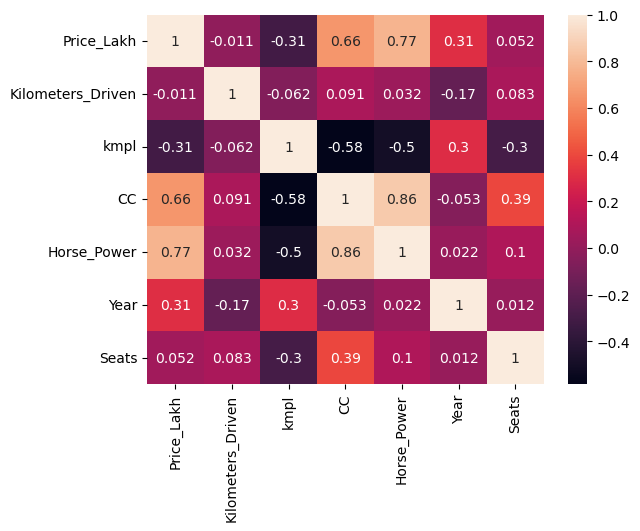

In [30]:
sns.heatmap(corr,annot=True)

**there is no strong correlation between feature that make us use feature selection**

### Visualization 

In [31]:
# visualize linear regression between targert and other features 
for i in data.select_dtypes("number").columns:
    fig=px.scatter(data,y="Price_Lakh",x=i,trendline="ols")
    fig.show()

In [32]:
# see distribution for numeric varaibles 
for i in data.select_dtypes("number").columns:
    fig=px.histogram(data,x=i,title=i)
    fig.show()

In [33]:
# visualize categorical data 
for i in data.select_dtypes("object").columns:
    fig=px.histogram(data,x=i,title=i,text_auto=True,barmode="group").update_xaxes(categoryorder="total descending")
    fig.show()

In [34]:
# identify direct competitores 
px.box(data,x="Price_Lakh",color="Brand",title="Direct Competiton according to price and brand")

In [35]:
data

,Price_Lakh,Brand,Model,Kilometers_Driven,kmpl,CC,Horse_Power,Year,Seats,Location,Fuel_Type,Transmission,Owner_Type
0,1.75,maruti,wagon r,72000,36.974,998.0,58.16,2010,5.0,mumbai,cng,manual,first
1,12.50,hyundai,creta 1.6,41000,19.670,1582.0,126.20,2015,5.0,pune,diesel,manual,first
2,4.50,honda,jazz,46000,18.200,1199.0,88.70,2011,5.0,chennai,petrol,manual,first
3,6.00,maruti,ertiga,87000,20.770,1248.0,88.76,2012,7.0,chennai,diesel,manual,first
4,17.74,audi,a4 new,40670,15.200,1968.0,140.80,2013,5.0,coimbatore,diesel,automatic,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.75,maruti,swift,27365,28.400,1248.0,74.00,2014,5.0,delhi,diesel,manual,first
6015,4.00,hyundai,xcent 1.1,100000,24.400,1120.0,71.00,2015,5.0,jaipur,diesel,manual,first
6016,2.90,mahindra,xylo d4,55000,14.000,2498.0,112.00,2012,8.0,jaipur,diesel,manual,second
6017,2.65,maruti,wagon r,46000,18.900,998.0,67.10,2013,5.0,kolkata,petrol,manual,first


In [36]:
map_data=data.groupby(["Location","Brand"]).agg({
    "Price_Lakh": "mean",
    "Kilometers_Driven": "mean",
    "kmpl": "mean"
}).reset_index()

In [37]:
# # Create a scatter geo plot
# fig = px.scatter_geo(map_data,
#                      lat='Latitude',
#                      lon='Longitude',
#                      text='Location',
#                      color='Brand',
#                      hover_name='Location',
#                      title='Brands in Different Cities of India',
#                      projection='equirectangular',
#                      scope='asia')

# fig.update_geos(center={"lat": 20.5937, "lon": 78.9629}, projection_scale=2.5)
# fig.show()

# # Show the map
# fig.show()

In [38]:
map_data

,Location,Brand,Price_Lakh,Kilometers_Driven,kmpl
0,ahmedabad,audi,14.600000,58610.400000,14.960000
1,ahmedabad,bmw,24.560667,71127.066667,19.034000
2,ahmedabad,chevrolet,3.525000,65500.000000,18.150000
3,ahmedabad,ford,5.716667,54668.333333,22.166667
4,ahmedabad,honda,5.620385,54844.538462,20.388462
...,...,...,...,...,...
247,pune,smart,3.000000,103000.000000,0.000000
248,pune,tata,2.801176,74998.676471,19.588353
249,pune,toyota,10.981395,94649.488372,14.567209
250,pune,volkswagen,5.019706,55738.794118,17.226176


## Feature Scaling 

In [39]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [40]:
# identify target 
target=data[["Price_Lakh"]]

In [41]:
# identify numeric and object features 
x_numeric=data.select_dtypes("number").drop(["Price_Lakh"],axis=1)
x_object=data.select_dtypes("object")

### Selecting best scaler for numeric data 

In [42]:
# create robust scaler and standard scaler objects 
robus_scaler=RobustScaler()
stand_scaler=StandardScaler()

In [43]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd


In [44]:
# Create a subplot with the number of rows equal to the number of columns in x_numeric
rows = len(x_numeric.columns)

# Create a subplot figure, with 3 columns per row (original, standard scaled, and robust scaled)
fig = make_subplots(rows=rows, cols=3, subplot_titles=["Original", "Standard Scaled", "Robust Scaled"])

for idx, col in enumerate(x_numeric.columns):
    # Original data
    fig.add_trace(
        go.Histogram(x=x_numeric[col], name=f"Original {col}"), 
        row=idx+1, col=1
    )
    
    # Standard Scaled data
    standard_scaled = StandardScaler().fit_transform(x_numeric[[col]])
    fig.add_trace(
        go.Histogram(x=standard_scaled[:, 0], name=f"Standard Scaled {col}"), 
        row=idx+1, col=2
    )
    
    # Robust Scaled data
    robust_scaled = RobustScaler().fit_transform(x_numeric[[col]])
    fig.add_trace(
        go.Histogram(x=robust_scaled[:, 0], name=f"Robust Scaled {col}"), 
        row=idx+1, col=3
    )

# Update layout with titles and axis labels
fig.update_layout(height=300*rows, width=900, title_text="Original vs Scaled Data Histograms")
fig.show()


**conclusion for the target we will use the standard scaler and for other freatures we wiil use the robust scaler beacuse it is more capable for handling outliers**

## Model Building and select best model 

In [45]:
# transform x numeric or features 
x_numeric_scaled=robus_scaler.fit_transform(x_numeric)

In [46]:
# transform target feature  
target_scaled=stand_scaler.fit_transform(target)

In [47]:
#use label and one hot encoder 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [48]:
for i in x_object.columns: 
    print(i)
    print(f"{len(x_object[i].unique())} unique value")
    print("-----------")

Brand
30 unique value
-----------
Model
646 unique value
-----------
Location
11 unique value
-----------
Fuel_Type
4 unique value
-----------
Transmission
2 unique value
-----------
Owner_Type
4 unique value
-----------


**To avoid high dimensionality  we will use label encoding for Brand , Model and Owner_Type and one hot encoding for location , fuel type , transmission**

In [49]:
# define feature scaling parameter for categorical data 
one_hot=OneHotEncoder(drop="first")
brand_encoder=LabelEncoder()
model_encoder=LabelEncoder()
owner_encoder=LabelEncoder()

In [50]:
x_object_one_hot=x_object[[ 'Location', 'Fuel_Type', 'Transmission']]

In [51]:
x_object_label=x_object[['Brand', 'Model','Owner_Type']]

In [52]:
x_object_one_hot_scaled=one_hot.fit_transform(x_object_one_hot).toarray()

In [53]:
cat_df=pd.DataFrame(x_object_one_hot_scaled,columns=one_hot.get_feature_names_out())

In [54]:

cat_df['Brand'] = brand_encoder.fit_transform(x_object_label['Brand'])
cat_df['Model'] = model_encoder.fit_transform(x_object_label['Model'])
cat_df['Owner_Type'] = owner_encoder.fit_transform(x_object_label['Owner_Type'])

In [55]:
cat_df

,Location_bangalore,Location_chennai,Location_coimbatore,Location_delhi,Location_hyderabad,Location_jaipur,Location_kochi,Location_kolkata,Location_mumbai,Location_pune,Fuel_Type_diesel,Fuel_Type_lpg,Fuel_Type_petrol,Transmission_manual,Brand,Model,Owner_Type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,17,588,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,10,159,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9,316,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17,215,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17,523,0
5971,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,610,0
5972,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16,633,2
5973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,17,588,0


In [56]:
numeric_df=pd.DataFrame(x_numeric_scaled,columns=robus_scaler.get_feature_names_out())

In [57]:
features=pd.concat([cat_df,numeric_df],axis=1)

In [58]:
features

,Location_bangalore,Location_chennai,Location_coimbatore,Location_delhi,Location_hyderabad,Location_jaipur,Location_kochi,Location_kolkata,Location_mumbai,Location_pune,...,Transmission_manual,Brand,Model,Owner_Type,Kilometers_Driven,kmpl,CC,Horse_Power,Year,Seats
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,17,588,0,0.486033,3.214726,-0.629771,-0.647136,-1.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,10,159,0,-0.306968,0.251712,0.113232,0.466448,0.25,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,9,316,0,-0.179065,0.000000,-0.374046,-0.147300,-0.75,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,17,215,0,0.869743,0.440068,-0.311705,-0.146318,-0.50,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,20,2,-0.315410,-0.513699,0.604326,0.705401,-0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,17,523,0,-0.655761,1.746575,-0.311705,-0.387889,0.00,0.0
5971,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,10,610,0,1.202292,1.061644,-0.474555,-0.436989,0.25,0.0
5972,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,16,633,2,0.051161,-0.719178,1.278626,0.234043,-0.50,3.0
5973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,17,588,0,-0.179065,0.119863,-0.629771,-0.500818,-0.25,0.0


In [59]:
target_scaled=pd.DataFrame(target_scaled,columns=stand_scaler.get_feature_names_out())

### Import Regression libraries 

In [60]:
# split data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [61]:
# split data 
X_train, X_test, y_train, y_test=train_test_split(features,target_scaled, test_size=0.2, random_state=42)

In [62]:
# XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=4, min_child_weight=2, n_jobs=4)
# RandomForestRegressor(random_state=1)
# LinearRegression()
# Ridge()
# Lasso()

In [63]:
def regression_model(model_name,xtr=X_train,ytr=y_train,xte=X_test,yte=y_test): 
    reg_model=model_name
    reg_model.fit(xtr,ytr)
    y_hat_test=reg_model.predict(xte)
    r2_test= r2_score(yte,y_hat_test)
    r2_train=r2_score(ytr,(reg_model.predict(xtr)))
    conclusion=r2_train - r2_test
    if conclusion <= 0.05 : 
         fitting = "underfit"
    elif conclusion > 0.1:
         fitting = "overfit"
    else: 
         fitting = "good fitting"
        
    print (f'the model used is {model_name} and training data r_squared = {r2_train}  and test data r_squared={r2_test}and the differenc between them = {conclusion} and the model is {fitting}')

In [64]:
regression_model(LinearRegression())

the model used is LinearRegression() and training data r_squared = 0.7310304760081527  and test data r_squared=0.4294530653277949and the differenc between them = 0.3015774106803578 and the model is overfit


In [65]:
regression_model(XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, min_child_weight=2, n_jobs=4 ,reg_alpha=0.1, reg_lambda=0.1))

the model used is XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...) and training data r_squared = 0.9972951412200928  and test data r_squared=0.8589855432510376and the differenc between them = 0.13830959796905518 and the model is overfit


In [66]:
regression_model(XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=1, min_child_weight=2, n_jobs=4 ,reg_alpha=0.1, reg_lambda=0.1))


the model used is XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...) and training data r_squared = 0.838422954082489  and test data r_squared=0.7455374002456665and the differenc between them = 0.09288555383682251 and the model is good fitting


In [67]:
regression_model (RandomForestRegressor(random_state=1))

d:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



the model used is RandomForestRegressor(random_state=1) and training data r_squared = 0.9861799083077123  and test data r_squared=0.8497687703096993and the differenc between them = 0.13641113799801297 and the model is overfit


In [68]:
model = XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=1, min_child_weight=2, n_jobs=4 ,reg_alpha=0.1, reg_lambda=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
import joblib
joblib.dump(model, 'car_price_model.pkl')
joblib.dump(stand_scaler, 'stand_scaler.pkl')
joblib.dump(robus_scaler, 'robust_scaler.pkl')
joblib.dump(brand_encoder, 'brand_encoder.pkl')
joblib.dump(model_encoder, 'model_encoder.pkl')
joblib.dump(owner_encoder, 'owner_encoder.pkl')
joblib.dump(one_hot, 'one_hot.pkl')

['one_hot.pkl']

In [70]:
X_train.columns

Index(['Location_bangalore', 'Location_chennai', 'Location_coimbatore',
       'Location_delhi', 'Location_hyderabad', 'Location_jaipur',
       'Location_kochi', 'Location_kolkata', 'Location_mumbai',
       'Location_pune', 'Fuel_Type_diesel', 'Fuel_Type_lpg',
       'Fuel_Type_petrol', 'Transmission_manual', 'Brand', 'Model',
       'Owner_Type', 'Kilometers_Driven', 'kmpl', 'CC', 'Horse_Power', 'Year',
       'Seats'],
      dtype='object')

In [71]:
# !pip install mlflow dagshub

In [72]:
import mlflow
import mlflow.sklearn

In [73]:
one_hot.categories_

[array(['ahmedabad', 'bangalore', 'chennai', 'coimbatore', 'delhi',
        'hyderabad', 'jaipur', 'kochi', 'kolkata', 'mumbai', 'pune'],
       dtype=object),
 array(['cng', 'diesel', 'lpg', 'petrol'], dtype=object),
 array(['automatic', 'manual'], dtype=object)]